# Flight Route Optimisation System

In [2]:
# Import Libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Airports Data
airports_data = {
    "code": ["DAC","DXB","DOH","LHR","JFK","SIN","KHI","BKK","CDG","FRA","DEL"],
    "name": [
        "Dhaka Hazrat Shahjalal International Airport",
        "Dubai International Airport",
        "Hamad International Airport",
        "London Heathrow",
        "John F. Kennedy International Airport",
        "Changi Airport",
        "Jinnah Intl Airport",
        "Suvarnabhumi Airport",
        "Charles de Gaulle",
        "Frankfurt am Main Airport",
        "Indira Gandhi International Airport"
    ],
    "city": ["Dhaka","Dubai","Doha","London","New York","Singapore",
             "Karachi","Bangkok","Paris","Frankfurt","Delhi"],
    "country": ["Bangladesh","United Arab Emirates","Qatar","United Kingdom",
                "United States","Singapore","Pakistan","Thailand","France",
                "Germany","India"],
    "lat": [23.8433,25.2532,25.2736,51.4700,40.6413,1.3644,
            24.9060,13.6900,49.0097,50.0379,28.5562],
    "lon": [90.3978,55.3657,51.6086,-0.4543,-73.7781,
            103.9915,67.1600,100.7501,2.5479,8.5622,77.1000]
}

airports_df = pd.DataFrame(airports_data)
print("Airports Data:")
display(airports_df)

Airports Data:


,code,name,city,country,lat,lon
0,DAC,Dhaka Hazrat Shahjalal International Airport,Dhaka,Bangladesh,23.8433,90.3978
1,DXB,Dubai International Airport,Dubai,United Arab Emirates,25.2532,55.3657
2,DOH,Hamad International Airport,Doha,Qatar,25.2736,51.6086
3,LHR,London Heathrow,London,United Kingdom,51.4700,-0.4543
4,JFK,John F. Kennedy International Airport,New York,United States,40.6413,-73.7781
5,SIN,Changi Airport,Singapore,Singapore,1.3644,103.9915
6,KHI,Jinnah Intl Airport,Karachi,Pakistan,24.9060,67.1600
7,BKK,Suvarnabhumi Airport,Bangkok,Thailand,13.6900,100.7501
8,CDG,Charles de Gaulle,Paris,France,49.0097,2.5479
9,FRA,Frankfurt am Main Airport,Frankfurt,Germany,50.0379,8.5622


In [4]:
# Routes Data
routes_data = {
    "source": ["DAC","DAC","DOH","DXB","DAC","KHI","DXB",
               "SIN","LHR","JFK","CDG","FRA","BKK","DAC","DAC"],
    "destination": ["DXB","DOH","LHR","LHR","KHI","DXB","SIN",
                    "SYD","JFK","CDG","FRA","LHR","SIN","BKK","DEL"],
    "distance_km": [4240,2750,6750,5500,1150,1100,5800,
                    6300,5600,5900,450,640,1500,3000,1800],
    "cost_usd": [300,200,450,400,120,140,420,500,500,480,120,150,200,250,180],
    "duration_min": [330,240,420,420,120,125,420,420,420,430,70,75,150,240,160]
}

routes_df = pd.DataFrame(routes_data)
print("Routes Data:")
display(routes_df)

Routes Data:


,source,destination,distance_km,cost_usd,duration_min
0,DAC,DXB,4240,300,330
1,DAC,DOH,2750,200,240
2,DOH,LHR,6750,450,420
3,DXB,LHR,5500,400,420
4,DAC,KHI,1150,120,120
5,KHI,DXB,1100,140,125
6,DXB,SIN,5800,420,420
7,SIN,SYD,6300,500,420
8,LHR,JFK,5600,500,420
9,JFK,CDG,5900,480,430


In [5]:
# Build Graph
G = nx.Graph()

for _, row in routes_df.iterrows():
    G.add_edge(row['source'], row['destination'], weight=row['distance_km'])

print(f"Graph built with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Graph built with 12 nodes and 15 edges.


In [6]:
# Shortest Path Function
def find_shortest_route(graph, source, destination):
    try:
        path = nx.shortest_path(graph, source=source,
                                target=destination, weight='weight')
        distance = nx.shortest_path_length(graph,
                                           source=source,
                                           target=destination,
                                           weight='weight')
        print(f"Optimal Route: {' → '.join(path)}")
        print(f"Total Distance: {distance} km")
        return path, distance
    except Exception as e:
        print(f"Error: {e}")
        return None, None

In [7]:
# Example Usage
source_airport = 'DAC'   # Dhaka
destination_airport = 'DEL'   # Delhi

path, distance = find_shortest_route
 (G, source_airport, destination_airport)

Optimal Route: DAC → DEL
Total Distance: 1800 km


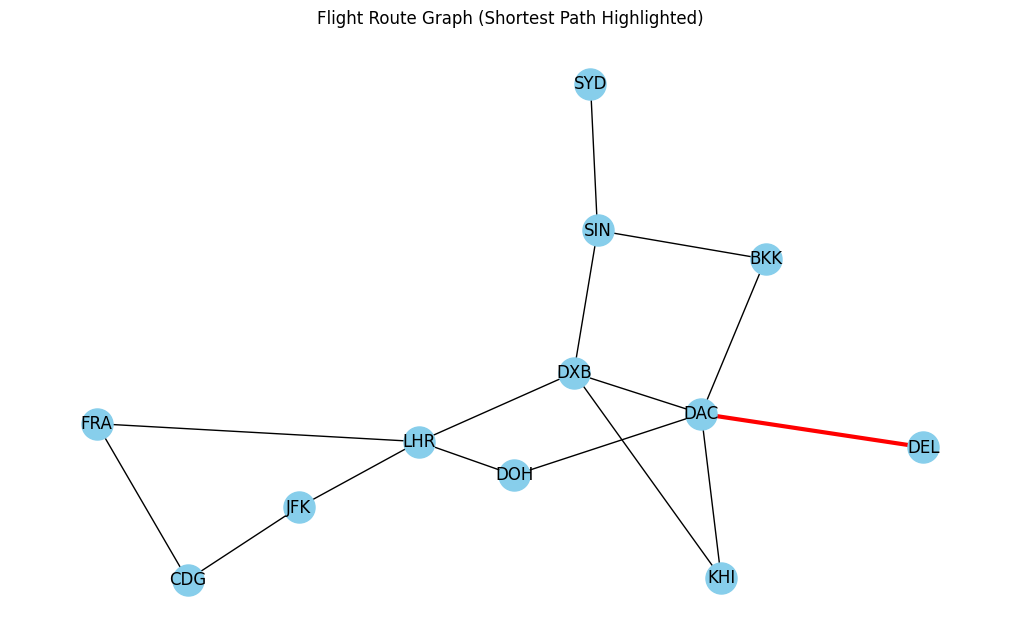

In [8]:
# Visualize Graph
def plot_graph(graph, path=None):
    plt.figure(figsize=(10,6))
    pos = nx.spring_layout(graph, seed=42)

    nx.draw(graph, pos, with_labels=True, node_size=500, node_color='skyblue')
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, width=3, edge_color='red')

    plt.title("Flight Route Graph (Shortest Path Highlighted)")
    plt.show()

plot_graph(G, path)